#### Supermarket 
supermaret is a place that we as human beings would love to shop for daily stuff. It sell a full range of food and beverages, as well as household items, and hygiene products, paaper products, pet products, automative products, gretting cards, cosmetics, dishes, medicines, household appliances, eletronic products etc. Current supermarket even have their own bakeries, flowers shop, various services are more welcomed to be joined in. 

#### The theme: 

I want to focus on **EDA analysis** (Exploratory data analysis) on this project and practice the **pandas, numpy, matplotlib** in Python. 

Analyzing the performances of stores in the past on basis of which will try to rectify defects as well as to leverage the positives finally, increase profits. 

In [105]:
## Import libraries and import data 

import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import missingno as msno

from google.colab import drive 
drive.mount('/content/drive')

data = pd.read_csv("drive/My Drive/Colab Notebooks/Big Data ML/Stores.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [106]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


The dataset is represented by 5 cases and 896 objects. 

Removing store ID information 

In [107]:
data.drop(data.columns[[0]],axis=1,inplace=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [109]:
data.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

There is no null value

### Exploratory Data Analysis





In [110]:
# First, check the statistics of the dataset 

data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


#### Let's check the data for the presence of categorical features

In [111]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


As we can see that there is no categorical variables. Let check the distribution of features. 

#### Some explaination: 

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

The matplotlib.pyplot.vlines() function plots the vertical lines across the axes. 

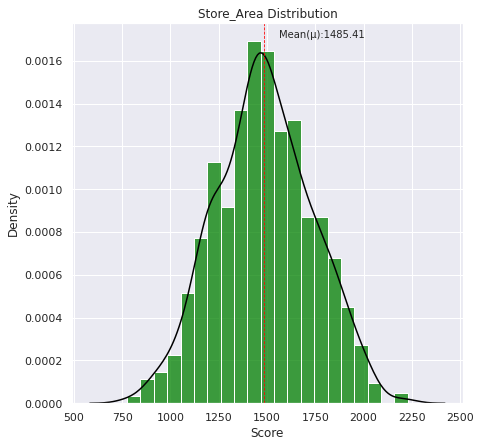

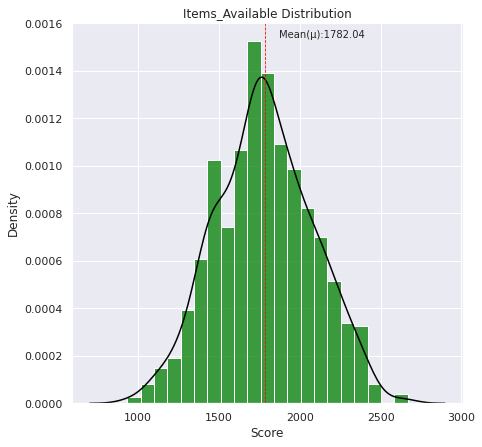

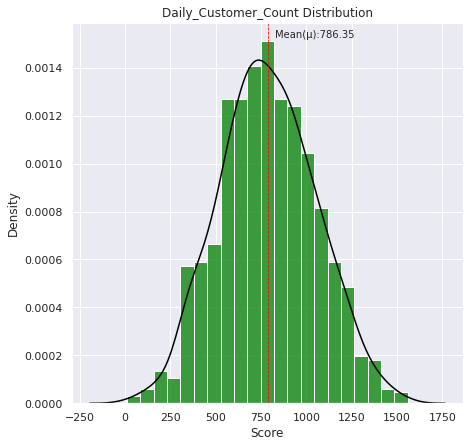

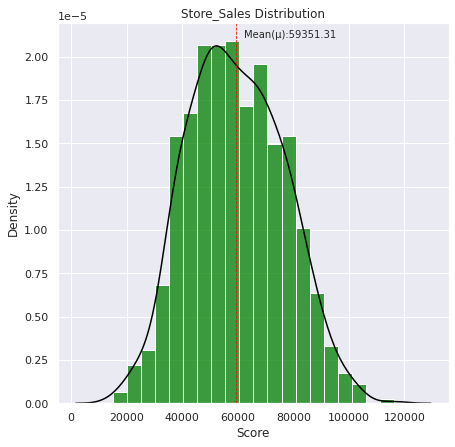

In [112]:
for column_name in data.columns: 
  plt.figure(figsize=(7,7))
  plt.title("{column_name} Distribution". format(column_name=column_name))
  sns.histplot(data[column_name], stat='density',color='green')
  sns.kdeplot(data[column_name], color='black')
  plt.axvline(data[column_name].mean(), color='red',linestyle='--',linewidth=0.8)
  min_ylim, max_ylim=plt.ylim()
  plt.text(data[column_name].mean()*1.05, max_ylim*0.96, 'Mean(μ):{:.2f}'.format(data[column_name].mean()))
  plt.xlabel('Score')
  plt.ylabel('Density')
  plt.show()

As we can see that all of the distributions are normal distribution(Gaussian Distribution), it will be extremely simple (makes math easier) to forecast a variable and find the probability of it within a range of values. 

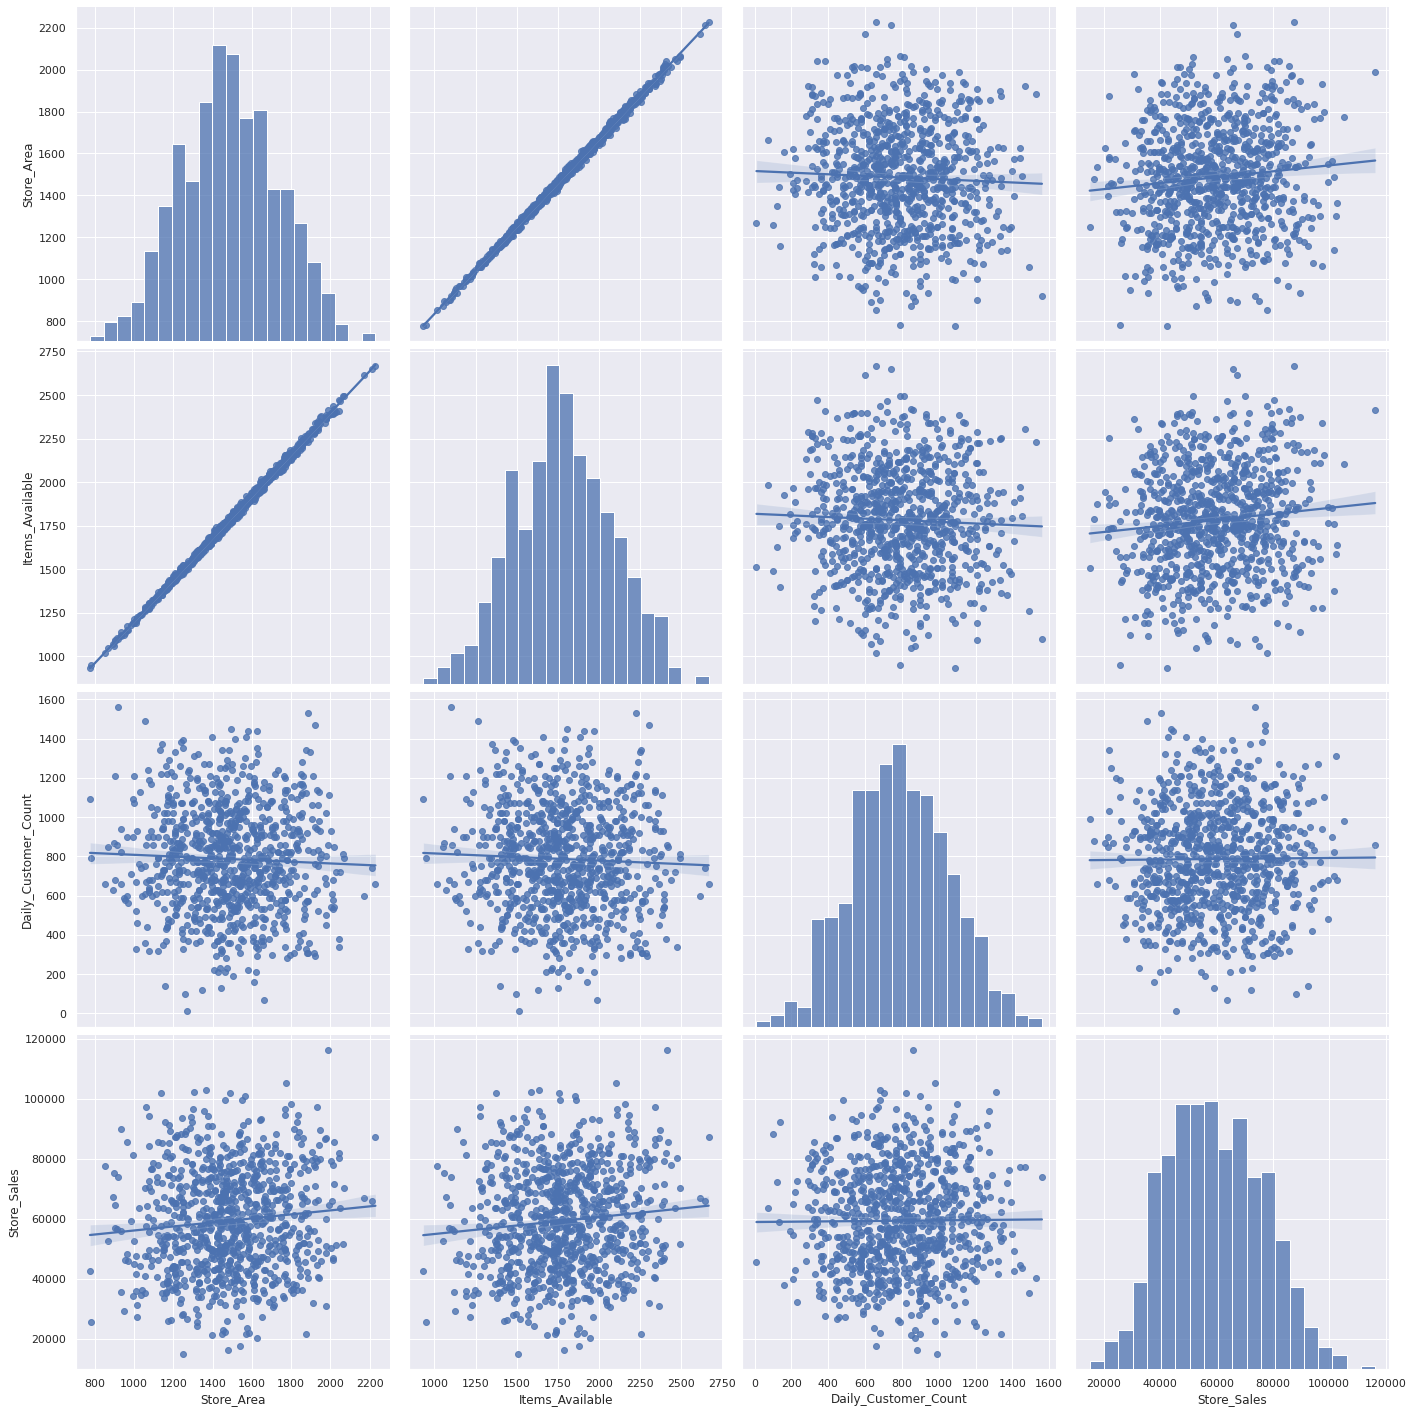

In [113]:
# Explore relationship 
sns.set()
sns.pairplot(data, height=5, kind='reg', diag_kind='auto')
plt.show()

#### Observations: 


*   With the growth of the store area, the number of items sold increase. This could come from increasing goods variety. 
*   We are interested in our target indicator-the amount of $ earned by the store. There is a slight correlation between store area(products sold) and the amount of money earned. 



We need to check outliers as well. To see if there is any extreme low or high values. According to the normal rule, no more than 2% of the data should be deleted.

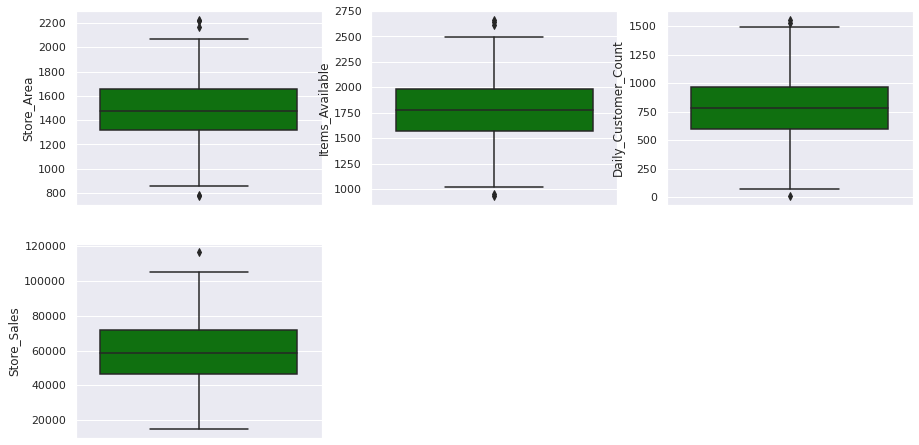

In [114]:
i = 1
plt.figure(figsize=(15,25))
for feature in data.columns: 
  plt.subplot(6,3,i)
  sns.boxplot(y=data[feature], color='green')
  i=i+1

As we can see from the boxplot above, there are minor outliers in our dataset which we will delet them later. 

### Correlation analysis 

carry out a correlation analysis of our target variable ('Store_Sales') 

In [115]:
correlation=data.corr()
print(correlation['Store_Sales'].sort_values(ascending=False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



Normally, we are interested in the maximum values. So here, use nlargest() function to get the first n rows ordered by columns in descending order. 

Index(['Store_Sales', 'Items_Available', 'Store_Area', 'Daily_Customer_Count'], dtype='object')


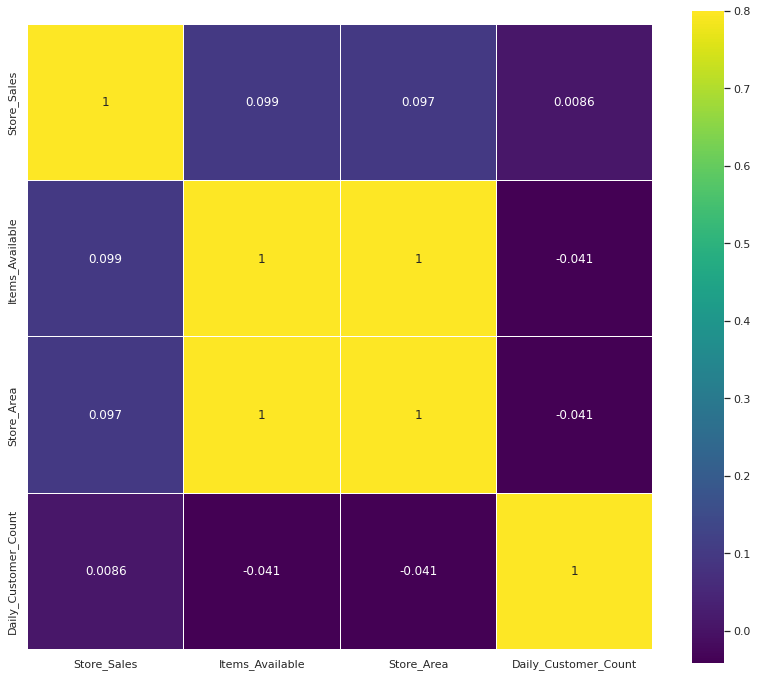

In [116]:
k=10
cols=correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm=np.corrcoef(data[cols].values.T)
f, ax=plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor='white', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)
plt.show()

The signs of the area and the goods being sold are completely correlated (corr=1), I suggest to remove one of them. 

In [117]:
data=data.drop('Store_Area', axis=1)

In [118]:
data

,Items_Available,Daily_Customer_Count,Store_Sales
0,1961,530,66490
1,1752,210,39820
2,1609,720,54010
3,1748,620,53730
4,2111,450,46620
...,...,...,...
891,1910,1080,66390
892,1663,850,82080
893,1436,1060,76440
894,1560,770,96610


### Cluster analysis 
 In retail industry, cluster analysis is often used. For this project, we use k-means to find the optimal number of clusters.

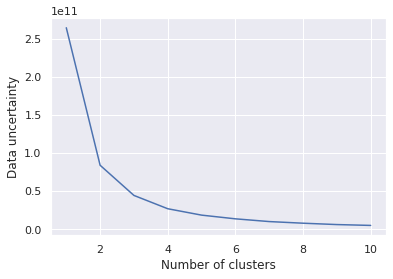

In [119]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(data)
  wcss.append(km.inertia_)

fig, ax=plt.subplots()
ax.plot(range(1,11), wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

The optimal number of clusters is 4. 

### Data preprocessing and machine learning 

We gonna use LOF (local outlier Factor) for unsupervised outlier detection. It does this by measuring the local density deviation of a given data point with respect to the data points near it. 

Normally: if the density of data points in local range of point P is smaller, the more likely point P is to be an abnormal point 

In [120]:
from sklearn.neighbors import LocalOutlierFactor

In [121]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(data) 

In [122]:
data['Out']=y_pred

In [123]:
Out=data[data['Out']!=1]

In [124]:
Out.shape

(20, 4)

In [125]:
data2=data[data['Out']==1]

In [126]:
data2

,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,1961,530,66490,1
1,1752,210,39820,1
2,1609,720,54010,1
3,1748,620,53730,1
4,2111,450,46620,1
...,...,...,...,...
891,1910,1080,66390,1
892,1663,850,82080,1
893,1436,1060,76440,1
894,1560,770,96610,1


Now, we have already finished cleaning data from outliers. Next we are split the data into training and testing and then apply machine learning model to test its RMSE, MAE and r2 score. 

We will use RandomForest, LinearRegression, ElasticNet, and KNeighbors, XGB

In [143]:
# import libraries 
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet


In [144]:
y=data2['Store_Sales']
X=data2.drop(['Store_Sales','Out'],axis=1)

In [145]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [152]:
from sklearn import metrics
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    r2_score(y_test, y_pred)*100

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'r2_score:{r2_score(y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 324041369.57799995
MAE: 14941.191145833332
r2_score:-0.2606980260571403
------------------------------ 

model: LinearRegression()
RMSE: 254003891.854681
MAE: 13228.167904160182
r2_score:0.01178603988418514
------------------------------ 

model: ElasticNet()
RMSE: 254003889.17001352
MAE: 13228.168461403227
r2_score:0.011786050329008813
------------------------------ 

model: KNeighborsRegressor()
RMSE: 299733602.9318182
MAE: 14503.147727272728
r2_score:-0.1661275288746118
------------------------------ 

[01:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model: XGBRegressor()
RMSE: 273840558.53585833
MAE: 13855.08602627841
r2_score:-0.06538943484326021
------------------------------ 



According to the RMSE and MAE, both metric are lower the better. We could say that linear regression performs better. 

### Conlusion 

How to increase sales in store? 

When think this question, we need to break it down into smaller pieces. Normally, two ways can be thought to increase sales: increase the check amount and attrac customers to the store. 

Howerver, we have to admit that sales are one of the first indicators of store performance just like what we did in our machine learning model. We can see that the MAE and RMSE could be high since there are more factors could be reflected the sales prediction. 

If you want to increase sales in the store, you may want to focus on attracting customers to the store or increase the average check. 

However, this is hard to conclude in a nutshell because according to different types of stores, their focuses could be differed. We could only say, paying attention to customers' shopping behaviors and keeping improving customers' shopping experiences along with customer services are necessary. 